In [22]:
#https://zhuanlan.zhihu.com/p/27550334
#数据处理
import numpy as np
import pandas as pd
import random
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

df = pd.read_csv('train.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 女性存活率统计
x = [df[(df.Sex=='male')]['Sex'].size, df[(df.Sex=='female')]['Sex'].size] 
y = [df[(df.Sex=='male') & (df.Survived == 1)]['Sex'].size, df[(df.Sex=='female') & (df.Survived == 1)]['Sex'].size]
print(x)#[男性数量，女性数量]
print(y)#[男性存活数，女性存活数]

[577, 314]
[109, 233]


In [19]:
df.Embarked[df.Embarked.isnull()] 
df.Embarked.dropna().mode().values

array(['S'], dtype=object)

In [21]:
df.Cabin[df.Cabin.isnull()]

Series([], Name: Cabin, dtype: object)

In [24]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [25]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


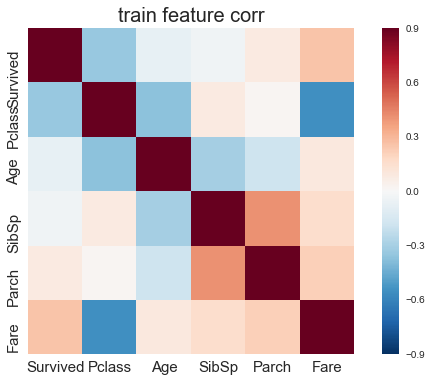

In [29]:
sns.set(context="paper", font="monospace")
sns.set(style="white")
f, ax = plt.subplots(figsize=(10,6))
train_corr = train.drop('PassengerId', axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=0.9, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns[::-1], size=15)
ax.set_title('train feature corr', fontsize=20)

In [31]:
# seaborn 教程,http://blog.csdn.net/ice_martin/article/details/61617053#matplotlib%E8%BF%9B%E9%98%B6seaborn%E6%95%99%E7%A8%8B
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x + i * .5)*(7-i)*flip)

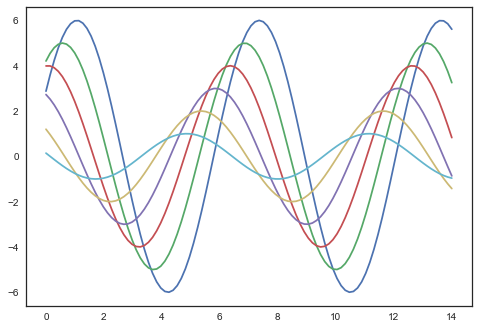

In [32]:
sinplot()
plt.show()

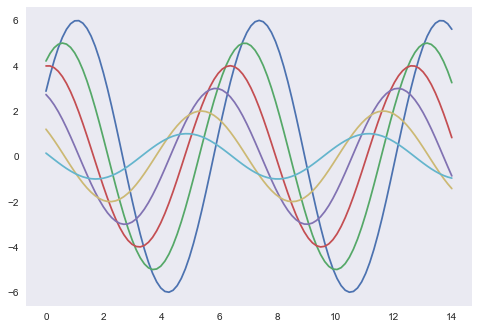

In [33]:
sns.set_style("dark")
sinplot()
plt.show()

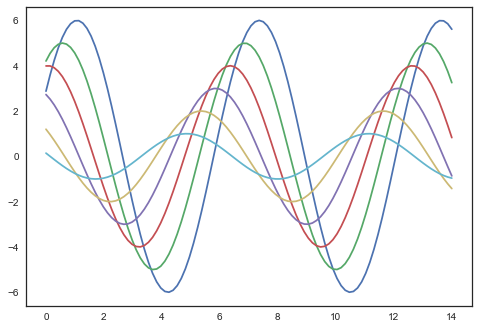

In [34]:
sns.set_style("white")
sinplot()
plt.show()

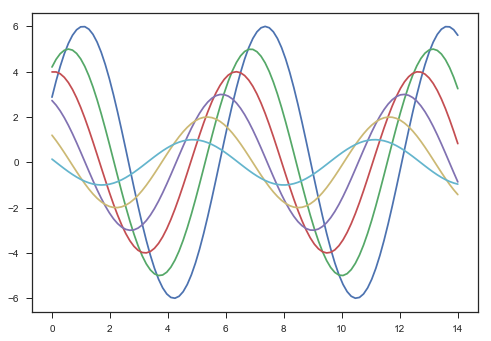

In [35]:
sns.set_style("ticks")
sinplot()
plt.show()

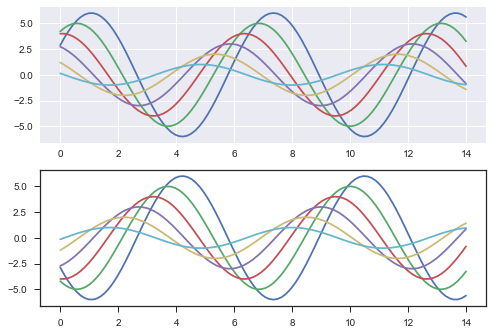

In [36]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
    
plt.subplot(212)
sinplot(-1)
plt.show()

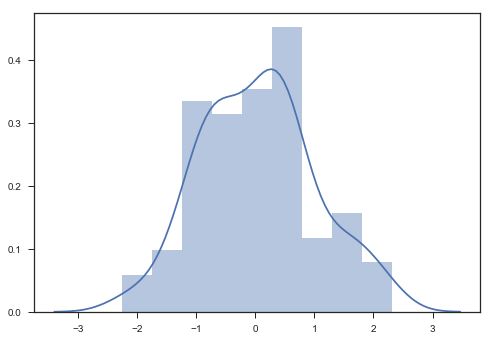

In [37]:
from scipy import stats, integrate
x = np.random.normal(size=100)#状态分布
sns.distplot(x)
plt.show()

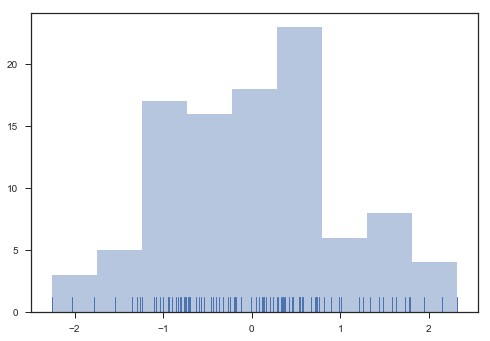

In [40]:
sns.distplot(x, kde=False,rug=True)
plt.show()

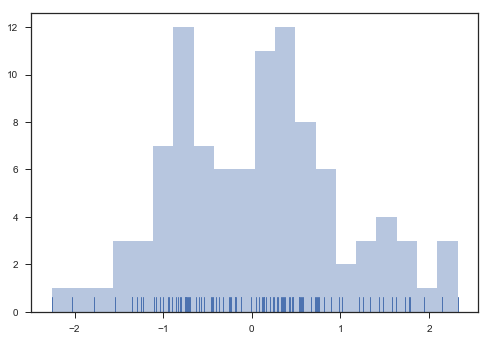

In [41]:
sns.distplot(x, bins=20,kde=False,rug=True)
plt.show()

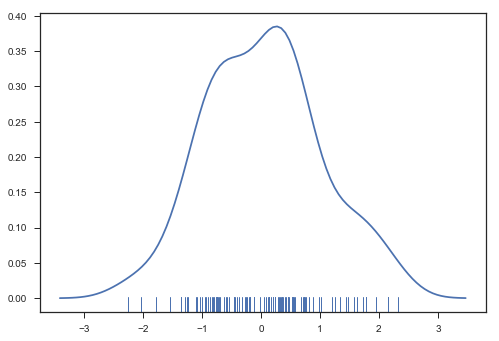

In [42]:
sns.distplot(x,hist=False,rug=True)
plt.show()

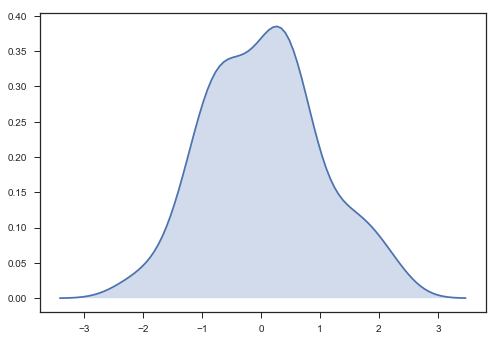

In [44]:
sns.kdeplot(x,shade=True)
plt.show()

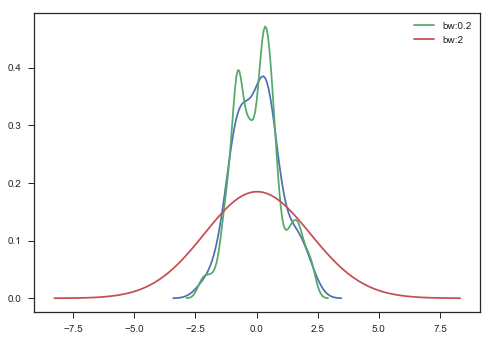

In [45]:
sns.kdeplot(x)
sns.kdeplot(x,bw=.2,label='bw:0.2')
sns.kdeplot(x,bw=2, label='bw:2')
plt.show()

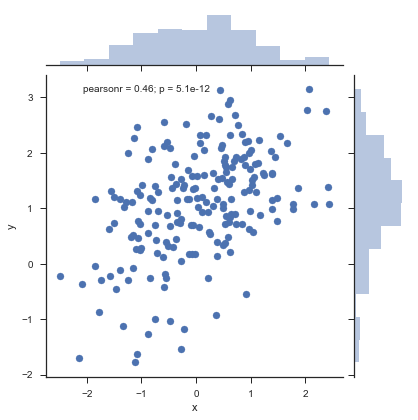

In [47]:
mean,cov = [0,1],[(1,.5),(.5,1)]
data=np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data,columns=['x','y'])
sns.jointplot(x='x',y='y',data=df)
plt.show()

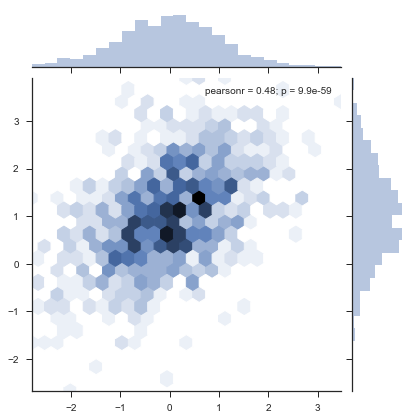

In [48]:
x,y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x,y=y,kind='hex')
plt.show()

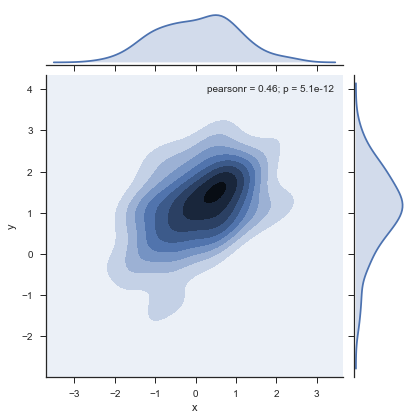

In [49]:
sns.jointplot(x='x',y='y',data=df,kind='kde')
plt.show()

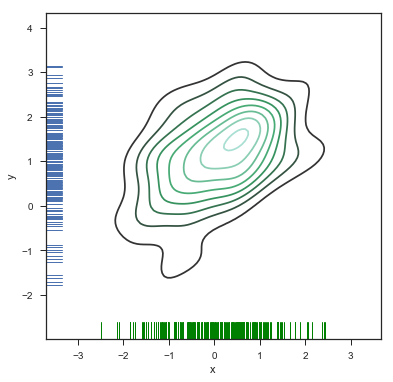

In [52]:
f,ax=plt.subplots(figsize=(6,6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)
plt.show()

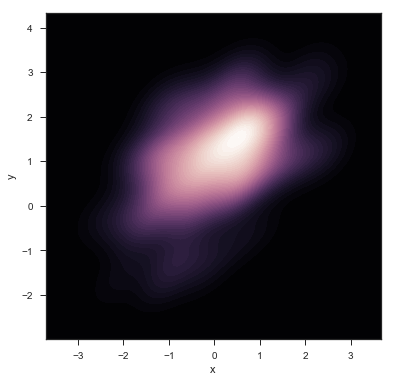

In [53]:
f,ax=plt.subplots(figsize=(6,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=True)
sns.kdeplot(df.x,df.y,cmap=cmap,n_levels=60,shade=True)
plt.show()

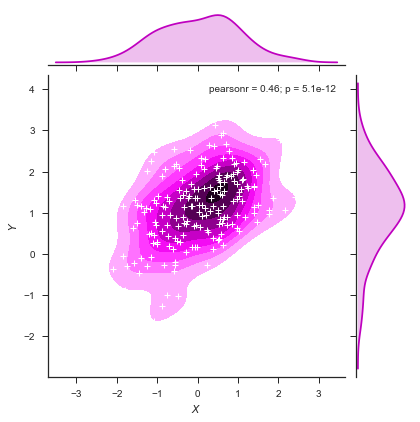

In [55]:
g=sns.jointplot(x='x',y='y',data=df,kind='kde',color='m')
g.plot_joint(plt.scatter, c='w',s=30,linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
plt.show()

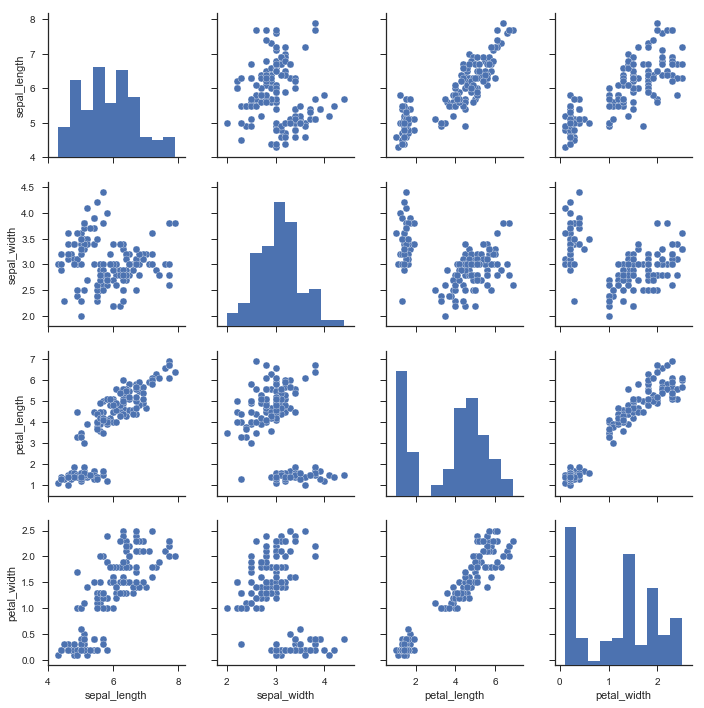

In [56]:
iris=sns.load_dataset('iris')
sns.pairplot(iris)
plt.show()

In [57]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


/Users/andrewy/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


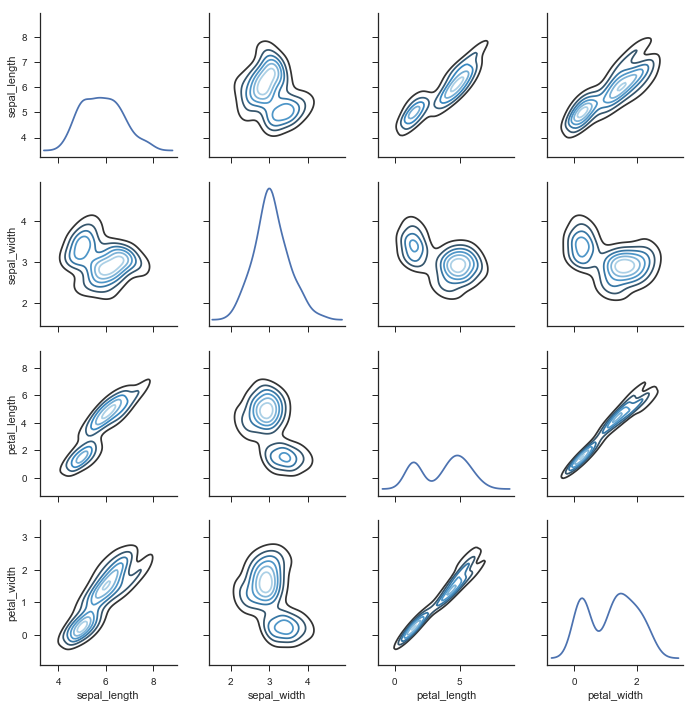

In [59]:
g=sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels=6)

In [60]:
titanic= sns.load_dataset('titanic')
tips   = sns.load_dataset('tips')
iris   = sns.load_dataset('iris')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


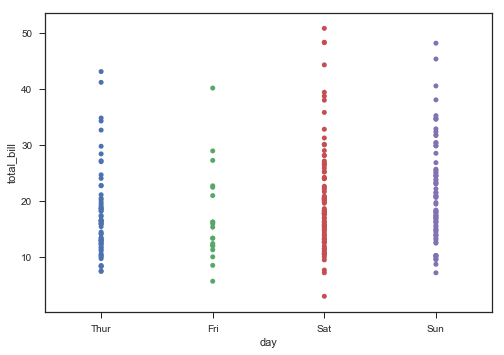

In [66]:
sns.stripplot(x='day',y='total_bill',data=tips)
plt.show()

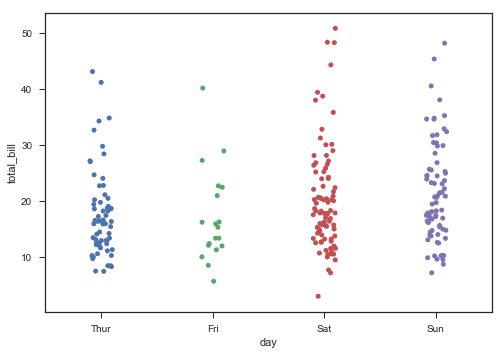

In [67]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)
plt.show()